# `Projet 7 : Implementez un modèle de scoring`

**Notebook Rassemblage des données**

Ce notebook est destinée au rassemblement des données des différents fichiers csv disponibles sur https://www.kaggle.com/c/home-credit-default-risk/data

Les reférences utilisés sont disponibles sur: https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda

Les étapes : 

- 1er Partie: Mise en Place et Installation des bibliotheques necessaires

- 2ème Partie: Telechargement des fichiers 

- 3ème Partie: Analyse pré-exploratoire des données

- 4ème Partie: Merging les datasets

- 5ème Partie : sauvegarde des datasets agregés

# `1er Partie: Mise en place et Installation de l'environnement`

---

Avec la :
- Instalation de libraries utiles à l'acquisition de la données ainsi que les différents traitements statistiques et visualisation nécessaire dans un premier temps (Pandas & Numpy)
- Confirmation et changement de "directory si necessaire avec os.getwd()
- Amélioration d'options d'affichage avec 'pd.set_option'

In [ ]:
# Outils mathématiques et manipulation de données
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

# Librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns
from textwrap import wrap

# Cross-validation et hyperparamétrisation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

# Transformateurs de variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# Librairie de Clustering
from sklearn.cluster import KMeans

# Metriques de Segmentation
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix

# Réduction de dimensions
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV

# Création de pipelines
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

In [ ]:
#savoir où est mon "directory"
import os
os.getcwd()

'/content'

In [ ]:
# Changer 'directory' sur google lab:
# 1st of all: connect to google drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Options d'affichage des outputs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
sns.color_palette("rocket") # choix de la palette de couleurs sns

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [ ]:
%pwd

'/content'

In [ ]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

# `2ème Partie: Telechargement`


Dans cette étape nous allons télécharger les bases de données 

In [ ]:
path_data = "drive/My Drive/Projet_7/database"

In [ ]:
# Prendre en compte le nom de toutes les archives .csv dans le dossier directory: 
li_files = []
for n_dir, _, n_files in os.walk(path_data):
    li_files = n_files
    print(n_dir, li_files)
li_files = sorted(li_files)

drive/My Drive/Projet_7/database ['HomeCredit_columns_description.csv', 'credit_card_balance.csv', 'bureau_balance.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'bureau.csv', 'sample_submission.csv', 'installments_payments.csv', 'previous_application.csv', 'application_train.csv']


In [ ]:
print(li_files)

['HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'previous_application.csv', 'sample_submission.csv']


In [ ]:
li_key_names = ['home_cred_desc','pos_cash_bal','app_test','app_train','bureau',
                'bureau_bal','ccard_bal','install_pay','prev_app','samp_subm']
dict_df = {}

In [ ]:
# Afficher le nom de toutes les archives .csv: 

for k, n_file in zip(li_key_names, li_files):
    print(k, n_file)
    dict_df[k] = pd.read_csv(path_data+'/'+ n_file, encoding = "ISO-8859-1")

home_cred_desc HomeCredit_columns_description.csv
pos_cash_bal POS_CASH_balance.csv
app_test application_test.csv
app_train application_train.csv
bureau bureau.csv
bureau_bal bureau_balance.csv
ccard_bal credit_card_balance.csv
install_pay installments_payments.csv
prev_app previous_application.csv
samp_subm sample_submission.csv


In [ ]:
dict_df.keys()

dict_keys(['home_cred_desc', 'pos_cash_bal', 'app_test', 'app_train', 'bureau', 'bureau_bal', 'ccard_bal', 'install_pay', 'prev_app', 'samp_subm'])

# `3ème partie : Analyse Pré-exploratoire des données: `

Dans cette étape nous effectuons une analyse pré-exploratoire pour mieux comprendre les donnnées qui nous donnerons les pistes de comment les rassembler.

In [ ]:
# Visualiser le "shape" de chaque .csv
for k, df in dict_df.items():
    display(f"{k}: {df.shape}")

'home_cred_desc: (219, 5)'

'pos_cash_bal: (10001358, 8)'

'app_test: (48744, 121)'

'app_train: (307511, 122)'

'bureau: (1716428, 17)'

'bureau_bal: (27299925, 3)'

'ccard_bal: (3840312, 23)'

'install_pay: (13605401, 8)'

'prev_app: (1670214, 37)'

'samp_subm: (48744, 2)'

In [ ]:
dict_df['app_train'].columns 

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
dict_df['app_train']['SK_ID_CURR'].is_unique  # SK_ID_CURR est l'id du fichier 'app_train' ? Yes

True

In [ ]:
type(dict_df)

dict

In [ ]:
# Checker les ids de chaque un des fichiers de notre base de données: 

for n_table, n_file in zip(li_key_names, li_files):
    print('--', n_file)
    print([col for col in dict_df[n_table].columns if dict_df[n_table][col].is_unique])

-- HomeCredit_columns_description.csv
['Unnamed: 0']
-- POS_CASH_balance.csv
[]
-- application_test.csv
['SK_ID_CURR']
-- application_train.csv
['SK_ID_CURR']
-- bureau.csv
['SK_ID_BUREAU']
-- bureau_balance.csv
[]
-- credit_card_balance.csv
[]
-- installments_payments.csv
[]
-- previous_application.csv
['SK_ID_PREV']
-- sample_submission.csv
['SK_ID_CURR']


 `Missing values: `

In [ ]:
# return a dataframe of missing values (total and percent)

def missing_data(data):
    
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100)\
        .sort_values(ascending=False)
    return pd.concat([total, percent],
                     axis=1,
                     keys=['Total', 'Percent'])

In [ ]:
# Overview des missings values : 

df_missing = pd.DataFrame()
for n_df, df in dict_df.items():
    df_missing = pd.concat([df_missing,
                            missing_data(df)['Percent'].to_frame(name=n_df)],
                           axis=1)

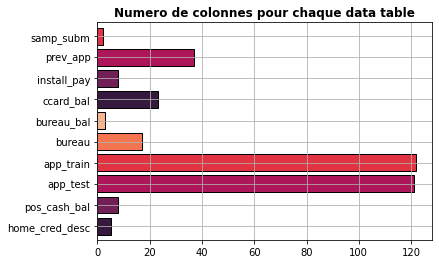

In [ ]:
# plot le nombre de colonnes pour chaque data table : 

colors = sns.color_palette("rocket")[:df_missing.shape[0]]
df_missing.count().plot.barh(ec='k', color=colors, width=0.8)
plt.title('Numero de colonnes pour chaque data table', fontweight='bold')
plt.grid()

## `Description des variables de chaque tableau : `

`app_{train|test}`

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

Plusieurs opérations pour chaque "customer":

- CREDIT_ACTIVE : If the credit has been totally payed
- DAYS_CREDIT : Number of days since the last demand
- CREDIT_DAY_OVERDUE : Number of days of late payment
- DAYS_CREDIT_ENDDATE : Days left before end of credit. Negative if credit has ended. (positive and negative values give the same information as CREDIT_ACTIVE)
- DAYS_ENDDATE_FACT : End of credit date. (same information than  DAYS_CREDIT_ENDDATE)
- AMT_CREDIT_MAX_OVERDUE : Total amount of overdue
- CNT_CREDIT_PROLONG Nombre : Number of times the credit has been delayed
- AMT_CREDIT_SUM : Total sum of the bureau loan
- AMT_CREDIT_SUM_DEBT : Sum left to pay
- AMT_CREDIT_SUM_LIMIT : Limit amount autorized for the loan
- AMT_CREDIT_SUM_OVERDUE : Amount of actual overdue
- CREDIT_TYPE : Kind of way to pay
- DAYS_CREDIT_UPDATE : Last update of informations
- AMT_ANNUITY : Amount payed each year


`bureau`

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

bureau (Appliation data from previous loans that client got from other institutions ans that were reported to Credit Bureau)

Equivalent of Bureau table, which list the credits the customer had in Home Credit, a the main information about it.

- NAME_CONTRACT_TYPE,
- AMT_ANNUITY : total anual repay
- AMT_APPLICATION : how much asked,
- AMT_CREDIT : total credit,
- AMT_GOODS_PRICE : total of the good to buy (can be correlated to AMT_ANNUITY),
- WEEKDAY_APPR_PROCESS_START : day in which the client asked,
- HOUR_APPR_PROCESS_START : hour in which the client applied,
- FLAG_LAST_APPL_PER_CONTRACT' : sometimes the client askedagain after being aproved,
- NFLAG_LAST_APPL_IN_DAY : if the client contract or try an other credit in the same day,
- NAME_CASH_LOAN_PURPOSE : purpose,
- NAME_CONTRACT_STATUS : If approved or refused,
- DAYS_DECISION : number of days to make the decision,
- NAME_PAYMENT_TYPE : payment type,
- CODE_REJECT_REASON' : reject reason,
- NAME_TYPE_SUITE : who accompagned client,
- NAME_CLIENT_TYPE : old or new client,
- NAME_GOODS_CATEGORY : product bought,
- NAME_PORTFOLIO : cash, pos, or car,
- NAME_PRODUCT_TYPE,
- CHANNEL_TYPE : way to attract client,
- CNT_PAYMENT : end of the last payment when asked, ,
- DAYS_FIRST_DRAWING : olest diturbance in last application,
- DAYS_FIRST_DUE : Supposed first due of previous credit,
- DAYS_LAST_DUE_1ST_VERSION: first due of previous credit,
- DAYS_LAST_DUE : date last due,
- DAYS_TERMINATION : date supposed last due,
- NFLAG_INSURED_ON_APPROVAL : requested an insurance or not


`bureau_balance`

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- MONTHS_BALANCE : Months of installment for application
- STATUS : If number, number of months of failure to pay


`POS_CASH_balance`

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- MONTHS_BALANCE : month of balance from application
- CNT_INSTALMENT : Term of previous credit
- CNT_INSTALMENT_FUTURE : Number of installment left to pay
- NAME_CONTRACT_STATUS : active or not
- SK_DPD : days past due on the month
- SK_DPD_DEF : day past du where the small mounth or small date are removed / tolerated


`credit_card_balance`

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- MONTHS_BALANCE : Month of the balance from application
- AMT_BALANCE : amount of the balance for the month
- AMT_CREDIT_LIMIT_ACTUAL : credit card limit during the month
- AMT_DRAWINGS_ATM_CURRENT : amount taken at ATM with the credit card
- AMT_DRAWINGS_CURRENT : Amount used with the credit card
- AMT_DRAWINGS_OTHER_CURRENT :other amount use with the creedit card ?
- AMT_DRAWINGS_POS_CURRENT : amount taken from AMT or bought during the month
- AMT_INST_MIN_REGULARITY : minimal installment
- AMT_PAYMENT_CURRENT : Payement for the month
- AMT_PAYMENT_TOTAL_CURRENT : Total payment for the month ?
- CNT_DRAWINGS_ATM_CURRENT : number of drawing at ATM
- CNT_DRAWINGS_CURRENT : number of use of credit card
- CNT_DRAWINGS_OTHER_CURRENT : number of other use of credit card ?
- CNT_DRAWINGS_POS_CURRENT : total number of use during the month
- CNT_INSTALMENT_MATURE_CUM : number of payed installments
- NAME_CONTRACT_STATUS : active or not
- SK_DPD : days past due on the month
- SK_DPD_DEF : day past du where the small mounth or small date are removed / tolerated


`previous_application`

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

POS_CASH_BALANCE (monthly balance of clients' previous loans in Home Credit)

Common features to POS and Credit, linked to specific installments

NUM_INSTALMENT_VERSION : version of installment
NUM_INSTALMENT_NUMBER : which installment is considered
DAYS_INSTALMENT : When was the installment supposed to be payed
DAYS_ENTRY_PAYMENT : When was it payed
AMT_INSTALMENT : Which amount was supposed to be payed
AMT_PAYMENT : How much was actually payed
installments_payments (Past payment data for each installmants of previous credits in Home Credit related to loans in our sample)

SK_ID_PREV
SK_ID_CURR
NUM_INSTALMENT_VERSION
NUM_INSTALMENT_NUMBER
DAYS_INSTALMENT
DAYS_ENTRY_PAYMENT
AMT_INSTALMENT
AMT_PAYMENT
previous_application (Application data of clients previous loans in Home Credit)

SK_ID_PREV SK_ID_CURR NAME_CONTRACT_TYPE AMT_ANNUITY AMT_APPLICATION AMT_CREDIT AMT_DOWN_PAYMENT AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT NFLAG_LAST_APPL_IN_DAY RATE_DOWN_PAYMENT RATE_INTEREST_PRIMARY RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE CHANNEL_TYPE SELLERPLACE_AREA NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL

# `4ème Partie: Merging les datasets`

Après avoir realisé une rapide analyse exploratoire des données passons au rassemblement des données avec:


- 1) Pré-traitement ( l'harmonisation des classes, 
- 2) Rassemblement des données

###  TABLEAUX `App{train|test}`

In [ ]:
# Verifier les différences entre "app_train" et "app_test"

for c in dict_df['app_train'].columns[dict_df['app_train'].dtypes == 'object']:
    c_train = set(dict_df['app_train'][c].unique())
    c_test = set(dict_df['app_test'][c].unique())
    diff = c_train ^ c_test
    len_diff = len(list(c_train)) - len(list(c_test))
    if len(diff) > 0:
        print('feature ' + c + \
' has DIFFERENT values in training set and test set: ---->  ', diff)
        print(len_diff, 'extra values in TRAIN') if len_diff > 0 else print(len_diff, 'Extra values in TEST') 
    else:
        print(f'{c} OK: same unique values in training set and test set')

NAME_CONTRACT_TYPE OK: same unique values in training set and test set
feature CODE_GENDER has DIFFERENT values in training set and test set: ---->   {'XNA'}
1 extra values in TRAIN
FLAG_OWN_CAR OK: same unique values in training set and test set
FLAG_OWN_REALTY OK: same unique values in training set and test set
NAME_TYPE_SUITE OK: same unique values in training set and test set
feature NAME_INCOME_TYPE has DIFFERENT values in training set and test set: ---->   {'Maternity leave'}
1 extra values in TRAIN
NAME_EDUCATION_TYPE OK: same unique values in training set and test set
feature NAME_FAMILY_STATUS has DIFFERENT values in training set and test set: ---->   {'Unknown'}
1 extra values in TRAIN
NAME_HOUSING_TYPE OK: same unique values in training set and test set
OCCUPATION_TYPE OK: same unique values in training set and test set
WEEKDAY_APPR_PROCESS_START OK: same unique values in training set and test set
ORGANIZATION_TYPE OK: same unique values in training set and test set
FONDKAPR

In [ ]:
# harmonisation des unique values sur "app_train" et "app_test"

dict_df['app_train']['CODE_GENDER'] = \
    dict_df['app_train']['CODE_GENDER'].map(lambda x: x if x != 'XNA' else np.nan)
dict_df['app_train']['NAME_INCOME_TYPE'] = \
    dict_df['app_train']['NAME_INCOME_TYPE'].map(lambda x: x if x != 'Maternity leave' else np.nan)
dict_df['app_train']['NAME_FAMILY_STATUS'] = \
    dict_df['app_train']['NAME_FAMILY_STATUS'].map(lambda x: x if x != 'Unknown' else np.nan)

## TABLEAUX `Bureau` et `bureau_balance`

In [ ]:
dict_df['bureau_bal'].head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


In [ ]:
dict_df['bureau'].head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,91323.00,0.00,NaN,0.00,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.00,NaN,NaN,0,225000.00,171342.00,NaN,0.00,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,464323.50,NaN,NaN,0.00,Consumer credit,-16,NaN


In [ ]:
dict_df['bureau_bal']['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [ ]:
dict_df['bureau_bal']['MONTHS_BALANCE'].value_counts()

-1     622601
-2     619243
-3     615080
 0     610965
-4     609138
-5     602663
-6     594277
-7     583794
-8     573566
-9     563804
-10    554414
-11    545221
-12    535358
-13    525959
-14    516918
-15    507846
-16    498927
-17    489156
-18    479320
-19    469398
-20    459924
-21    450646
-22    441906
-23    433222
-24    424284
-25    415684
-26    407428
-27    399392
-28    391202
-29    382985
-30    374563
-31    366109
-32    358194
-33    350275
-34    342708
-35    334731
-36    326799
-37    319026
-38    311186
-39    303181
-40    295141
-41    287182
-42    279098
-43    271325
-44    263783
-45    256973
-46    250247
-47    243500
-48    236650
-49    230385
-50    224284
-51    218241
-52    211937
-53    205730
-54    199649
-55    193574
-56    187702
-57    182174
-58    176765
-59    171778
-60    167164
-61    162861
-62    158972
-63    155238
-64    151649
-65    148075
-66    144657
-67    141590
-68    138855
-69    136260
-70    133954
-71   

### `Pré-traitement`

In [ ]:
# Remplacer les catégories 0 pour OK (Ces prêts ont un status = 0 quand il n'a pas de jours de retard de payement)

dict_df['bureau_bal'].loc[:,'STATUS'] = \
    dict_df['bureau_bal'].loc[:,'STATUS'].replace({'0': 'OK'})

In [ ]:
# Copie de la colonne status et remplacement des lettres par 0 
dict_df['bureau_bal']['STATUS_MONTHS_FAIL'] = \
                pd.to_numeric(dict_df['bureau_bal']['STATUS'],
                            errors='coerce').fillna(0)

In [ ]:
dict_df['bureau_bal']['STATUS_MONTHS_FAIL'].value_counts()

0.00    26956982
1.00      242347
5.00       62406
2.00       23419
3.00        8924
4.00        5847
Name: STATUS_MONTHS_FAIL, dtype: int64

In [ ]:
# keep categorical values in STATUS, change numbers to 'F'

mask = pd.to_numeric(dict_df['bureau_bal']['STATUS'],
                     errors='coerce').notna()

dict_df['bureau_bal'].loc[mask, 'STATUS'] = 'F'

In [ ]:
# aggregate along 'SK_ID_BUREAU'

def abs_min(x): return np.abs(np.min(x))
def mode(x): return x.mode()[0]

li_agg = {'MONTHS_BALANCE': [abs_min],
          'STATUS': [mode, 'size'],
          'STATUS_MONTHS_FAIL': ['mean', 'max']}

dict_df['bureau_bal'] = dict_df['bureau_bal'].groupby('SK_ID_BUREAU').agg(li_agg)

In [ ]:
# flatten two levels columns indices

dict_df['bureau_bal'].columns = ['__'.join(tup).strip() \
                                for tup in dict_df['bureau_bal'].columns.values]

### `merging bureau_balance in to into bureau`

In [ ]:
# merge 'bureau_bal' into 'bur'

dict_df['bureau'] = dict_df['bureau'].merge(dict_df['bureau_bal'],
                                      how='left',
                                      on='SK_ID_BUREAU')

In [ ]:
dict_df['bureau'].head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE__abs_min,STATUS__mode,STATUS__size,STATUS_MONTHS_FAIL__mean,STATUS_MONTHS_FAIL__max
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,91323.00,0.00,NaN,0.00,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.00,NaN,NaN,0,225000.00,171342.00,NaN,0.00,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,464323.50,NaN,NaN,0.00,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# add prefix to the name of the columns

dict_df['bureau'].columns = ['CB_'+col if col not in ['SK_ID_BUREAU',
                                                  'SK_ID_CURR'] \
                            else col for col in dict_df['bureau'].columns]

In [ ]:
dict_df['bureau'].head(3)

,SK_ID_CURR,SK_ID_BUREAU,CB_CREDIT_ACTIVE,CB_CREDIT_CURRENCY,CB_DAYS_CREDIT,CB_CREDIT_DAY_OVERDUE,CB_DAYS_CREDIT_ENDDATE,CB_DAYS_ENDDATE_FACT,CB_AMT_CREDIT_MAX_OVERDUE,CB_CNT_CREDIT_PROLONG,CB_AMT_CREDIT_SUM,CB_AMT_CREDIT_SUM_DEBT,CB_AMT_CREDIT_SUM_LIMIT,CB_AMT_CREDIT_SUM_OVERDUE,CB_CREDIT_TYPE,CB_DAYS_CREDIT_UPDATE,CB_AMT_ANNUITY,CB_MONTHS_BALANCE__abs_min,CB_STATUS__mode,CB_STATUS__size,CB_STATUS_MONTHS_FAIL__mean,CB_STATUS_MONTHS_FAIL__max
0,215354,5714462,Closed,currency 1,-497,0,-153.00,-153.00,NaN,0,91323.00,0.00,NaN,0.00,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.00,NaN,NaN,0,225000.00,171342.00,NaN,0.00,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.00,NaN,NaN,0,464323.50,NaN,NaN,0.00,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN


## TABLEAUX `Previous loans in Home Credit`


1. 'previous_application', décrit les prêt précedents dans 'Home Credit'
2. 'POS_CASH_balance', 'installments_payments' and 'credit_card_balance' donne des informations sur ces prêts (elle doit etre merged avec le tableau 'previous application')



In [ ]:
# harmonisation des valeurs uniques avec les autres tableaux : 

dict_df['prev_app']['NAME_CONTRACT_STATUS'] = \
                dict_df['pos_cash_bal']['NAME_CONTRACT_STATUS']\
                            .map(lambda x: x if x != 'XNA' else np.nan)
dict_df['pos_cash_bal']['NAME_CONTRACT_STATUS'] = \
                dict_df['pos_cash_bal']['NAME_CONTRACT_STATUS']\
                            .map(lambda x: x if x != 'XNA' else np.nan)

In [ ]:
# One Hot Encoding of status contract for each

dict_df['pos_cash_bal'] = pd.get_dummies(dict_df['pos_cash_bal'],
                                         prefix='N_CONTR_ST',
                                         columns=['NAME_CONTRACT_STATUS'])

In [ ]:
# aggregate along 'SK_ID_PREV'

def abs_min(x): return np.abs(np.min(x))

li_agg = {'MONTHS_BALANCE': [abs_min],
          'CNT_INSTALMENT': ['max'], # nb of changes in the instalment parameters
          'CNT_INSTALMENT_FUTURE': ['max'], # maximum number of instalments 
          'N_CONTR_ST_Active': ['sum'],
          'N_CONTR_ST_Completed': ['sum'],
          'N_CONTR_ST_Signed': ['sum'],
          'N_CONTR_ST_Demand': ['sum'],
          'N_CONTR_ST_Returned to the store': ['sum'],
          'N_CONTR_ST_Approved': ['sum'],
          'N_CONTR_ST_Amortized debt': ['sum'],
          'N_CONTR_ST_Canceled': ['sum'],
          'SK_DPD': ['mean'], # days past due
          'SK_DPD_DEF': ['mean'], # days past due with tolerance
          }

dict_df['pos_cash_bal'] = \
            dict_df['pos_cash_bal'].groupby('SK_ID_PREV').agg(li_agg)

In [ ]:
# flatten two levels columns indices

dict_df['pos_cash_bal'].columns = ['__'.join(tup).strip() \
                             for tup in dict_df['pos_cash_bal'].columns.values]

In [ ]:
# add prefix to the name of the columns before merging (PrL: previous loan)

dict_df['pos_cash_bal'].columns = ['PrLCash_'+col if col not in ['SK_ID_BUREAU',
                                                  'SK_ID_CURR'] \
                                  else col for col in dict_df['pos_cash_bal'].columns ]

In [ ]:
# merge 'pos_cash_bal' with 'prev_app'

dict_df['prev_app'] = dict_df['prev_app'].merge(dict_df['pos_cash_bal'],
                                                how='left',
                                                on='SK_ID_PREV')

## TABLEAUX `installments_payments -> previous_applications`

In [ ]:
# assign a new feature: delay for the payment of each installment

dict_df['install_pay'] = \
        dict_df['install_pay'].assign(DELAY_DAYS_INSTALMENT=\
                                    lambda x: x['DAYS_ENTRY_PAYMENT']-\
                                              x['DAYS_INSTALMENT'])

# drop the columns 'days'

dict_df['install_pay'] = \
                dict_df['install_pay'].drop(columns=['DAYS_INSTALMENT',
                                                     'DAYS_ENTRY_PAYMENT'])

In [ ]:
# aggregate along 'SK_ID_PREV'

def amp(x): return (np.max(x) - np.min(x))

li_agg = {
          'NUM_INSTALMENT_VERSION': ['max'], # nb of changes in the instalment parameters
          'NUM_INSTALMENT_NUMBER': ['max'], # maximum number of instalments 
          'AMT_INSTALMENT': ['mean', 'sum', amp, 'max', 'size'], # amount of installments
          'AMT_PAYMENT': ['sum'], # to check the amount of unpaid loans
          'DELAY_DAYS_INSTALMENT': ['mean', amp, 'max'], # delay for payment
          }

dict_df['install_pay'] = \
                     dict_df['install_pay'].groupby('SK_ID_PREV').agg(li_agg)

In [ ]:
# flatten two levels columns indices

dict_df['install_pay'].columns = ['__'.join(tup).strip() \
                             for tup in dict_df['install_pay'].columns.values]

In [ ]:
dict_df['install_pay'] = dict_df['install_pay'].reset_index()

In [ ]:
# add prefix to the name of the columns before merging (PrLI: previous loan installment)

dict_df['install_pay'].columns = ['PrLI_'+col if col not in ['SK_ID_PREV'] \
                            else col for col in dict_df['install_pay'].columns]

In [ ]:
# merge 'install_pay' into 'prev_app'

dict_df['prev_app'] = dict_df['prev_app'].merge(dict_df['install_pay'],
                                                how='left',
                                                on='SK_ID_PREV')

## TABLEAUX `credit_card_balance -> previous_applications`

In [ ]:
# drop redundant columns

dict_df['ccard_bal'] = dict_df['ccard_bal']\
    .drop(columns=['AMT_PAYMENT_CURRENT',
                   'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
                   'CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_POS_CURRENT',
                   'CNT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_ATM_CURRENT',
                   'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT'
                   ])

In [ ]:
# One Hot Encoding of status contract for each

dict_df['ccard_bal'] = pd.get_dummies(dict_df['ccard_bal'],
                                      prefix='N_CONTR_ST',
                                      columns=['NAME_CONTRACT_STATUS'])

In [ ]:
# find the AMT_CREDIT_LIMIT for the last month (to merge to the aggregated dataframe later)

ind = dict_df['ccard_bal'].groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()
ser_last_AMT_CREDIT_LIMIT_ACTUAL = dict_df['ccard_bal'].loc[ind, ['SK_ID_PREV',
                                                                  'AMT_CREDIT_LIMIT_ACTUAL']]
ser_last_AMT_CREDIT_LIMIT_ACTUAL = \
                    ser_last_AMT_CREDIT_LIMIT_ACTUAL.set_index('SK_ID_PREV')
ser_last_AMT_CREDIT_LIMIT_ACTUAL.columns = ['AMT_CREDIT_LIMIT_ACTUAL_last']

In [ ]:
# aggregate along 'SK_ID_PREV'

li_agg = {
          'MONTHS_BALANCE': [abs_min, 'size'],
          'AMT_BALANCE': [amp, 'max', 'mean'],
          'AMT_CREDIT_LIMIT_ACTUAL': ['mean'],
          'AMT_DRAWINGS_CURRENT': ['mean'],
          'AMT_INST_MIN_REGULARITY': ['mean'],
          'AMT_PAYMENT_TOTAL_CURRENT': [amp, 'max', 'mean'],
          'AMT_TOTAL_RECEIVABLE': [amp, 'max', 'mean'],
          'CNT_DRAWINGS_CURRENT': [amp, 'max', 'mean'],
          'CNT_INSTALMENT_MATURE_CUM': ['max'], # nb of paid installments 
          'N_CONTR_ST_Active': ['sum'],
          'N_CONTR_ST_Completed': ['sum'],
          'N_CONTR_ST_Signed': ['sum'],
          'N_CONTR_ST_Demand': ['sum'],
          'N_CONTR_ST_Refused': ['sum'],
          'N_CONTR_ST_Approved': ['sum'],   
          'N_CONTR_ST_Sent proposal': ['sum'],
          'SK_DPD': ['mean'], # days past due
          'SK_DPD_DEF': ['mean'], # days past due with tolerance
          }

dict_df['ccard_bal'] = \
                     dict_df['ccard_bal'].groupby('SK_ID_PREV').agg(li_agg)

In [ ]:
# flatten two levels columns indices

dict_df['ccard_bal'].columns = ['__'.join(tup).strip() \
                             for tup in dict_df['ccard_bal'].columns.values]

In [ ]:
dict_df['ccard_bal'] = dict_df['ccard_bal'].reset_index()

In [ ]:
# add the last amount credit limit

dict_df['ccard_bal'] = \
                    dict_df['ccard_bal'].merge(ser_last_AMT_CREDIT_LIMIT_ACTUAL,
                                               'left', on='SK_ID_PREV')

In [ ]:
# add prefix to the name of the columns before merging (PrLC: previous loan credit card)

dict_df['ccard_bal'].columns = ['PrLC_'+col if col not in ['SK_ID_PREV'] \
                            else col for col in dict_df['ccard_bal'].columns]

In [ ]:
# merge 'ccard_bal' into 'prev_app'

dict_df['prev_app'] = dict_df['prev_app'].merge(dict_df['ccard_bal'],
                                           how='left',
                                           on='SK_ID_PREV')

## TABLEAUX `bureau -> application_train/test`

In [ ]:
dict_df['bureau'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 0 to 1716427
Data columns (total 22 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   SK_ID_CURR                   int64  
 1   SK_ID_BUREAU                 int64  
 2   CB_CREDIT_ACTIVE             object 
 3   CB_CREDIT_CURRENCY           object 
 4   CB_DAYS_CREDIT               int64  
 5   CB_CREDIT_DAY_OVERDUE        int64  
 6   CB_DAYS_CREDIT_ENDDATE       float64
 7   CB_DAYS_ENDDATE_FACT         float64
 8   CB_AMT_CREDIT_MAX_OVERDUE    float64
 9   CB_CNT_CREDIT_PROLONG        int64  
 10  CB_AMT_CREDIT_SUM            float64
 11  CB_AMT_CREDIT_SUM_DEBT       float64
 12  CB_AMT_CREDIT_SUM_LIMIT      float64
 13  CB_AMT_CREDIT_SUM_OVERDUE    float64
 14  CB_CREDIT_TYPE               object 
 15  CB_DAYS_CREDIT_UPDATE        int64  
 16  CB_AMT_ANNUITY               float64
 17  CB_MONTHS_BALANCE__abs_min   float64
 18  CB_STATUS__mode              object 
 19  

In [ ]:
# drop the currency column

dict_df['bureau'] = dict_df['bureau'].drop(columns=['CB_CREDIT_CURRENCY'])

In [ ]:
# replace similar values

dict_df['bureau']['CB_CREDIT_TYPE'] = \
    dict_df['bureau']['CB_CREDIT_TYPE'].replace(['Another type of loan',
                                            'Unknown type of loan',
                                            'Cash loan (non-earmarked)',
                                            'Mobile operator loan',
                                            'Interbank credit'],
                                            np.nan)
dict_df['bureau']['CB_CREDIT_TYPE'] = \
    dict_df['bureau']['CB_CREDIT_TYPE'].replace(['Loan for business development',
                                            'Loan for the purchase of equipment',
                                            'Loan for purchase of shares (margin lending)'],
                                            'Loan for business development')
dict_df['bureau']['CB_CREDIT_TYPE'] = \
    dict_df['bureau']['CB_CREDIT_TYPE'].replace(['Real estate loan',
                                            'Mortgage'],
                                            'Mortgage')

In [ ]:
# One Hot Encoding of status contract for each 'CB_CREDIT_TYPE'

dict_df['bureau'] = pd.get_dummies(dict_df['bureau'],
                                prefix='CB_CR_TY',
                                columns=['CB_CREDIT_TYPE'])

In [ ]:
# One Hot Encoding of status contract for each 'CB_CREDIT_ACTIVE'

dict_df['bureau'] = pd.get_dummies(dict_df['bureau'],
                                prefix='CB_CR_ACT',
                                columns=['CB_CREDIT_ACTIVE'])

In [ ]:
# One Hot Encoding of status contract for each 'CB_STATUS__mode'

dict_df['bureau'] = pd.get_dummies(dict_df['bureau'],
                                prefix='CB_ST__mode',
                                columns=['CB_STATUS__mode'])

In [ ]:
dict_df['bureau'] = dict_df['bureau'].drop(columns=['CB_DAYS_CREDIT_UPDATE'])

In [ ]:
dict_df['bureau'].sample(3)

,SK_ID_CURR,SK_ID_BUREAU,CB_DAYS_CREDIT,CB_CREDIT_DAY_OVERDUE,CB_DAYS_CREDIT_ENDDATE,CB_DAYS_ENDDATE_FACT,CB_AMT_CREDIT_MAX_OVERDUE,CB_CNT_CREDIT_PROLONG,CB_AMT_CREDIT_SUM,CB_AMT_CREDIT_SUM_DEBT,CB_AMT_CREDIT_SUM_LIMIT,CB_AMT_CREDIT_SUM_OVERDUE,CB_AMT_ANNUITY,CB_MONTHS_BALANCE__abs_min,CB_STATUS__size,CB_STATUS_MONTHS_FAIL__mean,CB_STATUS_MONTHS_FAIL__max,CB_CR_TY_Car loan,CB_CR_TY_Consumer credit,CB_CR_TY_Credit card,CB_CR_TY_Loan for business development,CB_CR_TY_Loan for working capital replenishment,CB_CR_TY_Microloan,CB_CR_TY_Mortgage,CB_CR_ACT_Active,CB_CR_ACT_Bad debt,CB_CR_ACT_Closed,CB_CR_ACT_Sold,CB_ST__mode_C,CB_ST__mode_F,CB_ST__mode_OK,CB_ST__mode_X
161941,141032,6250758,-843,0,-143.00,-143.00,NaN,0,462438.00,0.00,0.00,0.00,0.00,27.00,28.00,0.00,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
215609,341640,6565888,-784,0,-44.00,-134.00,0.00,0,585000.00,0.00,0.00,0.00,NaN,25.00,26.00,0.00,0.00,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
578165,139806,6305991,-2276,0,-1911.00,NaN,3898.53,0,44550.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# aggregate along 'SK_ID_CURR'

li_agg = {'CB_DAYS_CREDIT': [abs_min],
          'CB_CREDIT_DAY_OVERDUE': ['sum','max'], # days past due
          'CB_DAYS_CREDIT_ENDDATE': ['max'], # max remaining duration of credit
          'CB_DAYS_ENDDATE_FACT': ['min'], # delay since last
          'CB_AMT_CREDIT_MAX_OVERDUE': ['mean', 'max'], # max amount overdue
          'CB_CNT_CREDIT_PROLONG': ['mean'], # nb of times credit was prolongated
          'CB_AMT_CREDIT_SUM': ['mean', 'sum'],
          'CB_AMT_CREDIT_SUM_DEBT': ['sum'],
          'CB_AMT_CREDIT_SUM_LIMIT': ['sum'],
          'CB_AMT_CREDIT_SUM_OVERDUE': ['sum'],
          'CB_AMT_ANNUITY': ['mean'],
          'CB_MONTHS_BALANCE__abs_min': [amp, 'mean', 'max'], # nb of month (total duration) of the contract		
          'CB_STATUS__size': ['sum'], # nb of months (idem above), cumulated
          'CB_STATUS_MONTHS_FAIL__mean': ['mean'],
          'CB_STATUS_MONTHS_FAIL__max': ['max'],
          'CB_CR_TY_Car loan': ['sum'],
          'CB_CR_TY_Consumer credit': ['sum'],
          'CB_CR_TY_Credit card': ['sum'],
          'CB_CR_TY_Loan for business development': ['sum'],
          'CB_CR_TY_Loan for working capital replenishment': ['sum'],
          'CB_CR_TY_Microloan': ['sum'],
          'CB_CR_TY_Mortgage': ['sum'],
          'CB_CR_ACT_Active': ['sum'],
          'CB_CR_ACT_Bad debt': ['sum'],
          'CB_CR_ACT_Closed': ['sum'],
          'CB_CR_ACT_Sold': ['sum'],
          'CB_ST__mode_C': ['sum'],
          'CB_ST__mode_F': ['sum'],
          'CB_ST__mode_OK': ['sum'],
          'CB_ST__mode_X': ['sum'],
          }

dict_df['bureau'] = \
            dict_df['bureau'].groupby('SK_ID_CURR').agg(li_agg)

In [ ]:
# flatten two levels columns indices

dict_df['bureau'].columns = ['__'.join(tup).strip() \
                             for tup in dict_df['bureau'].columns.values]

dict_df['bureau'] = dict_df['bureau'].reset_index()

In [ ]:
# add prefix to the name of the columns before merging (PrL: previous loan)

dict_df['bureau'].columns = ['Bureau_'+col if col not in ['SK_ID_BUREAU',
                                                  'SK_ID_CURR'] \
                                  else col for col in dict_df['bureau'].columns ]

In [ ]:
# merge 'bur' with 'app_train' and 'app_test'

dict_df['app_train'] = dict_df['app_train'].merge(dict_df['bureau'],
                                                how='left',
                                                on='SK_ID_CURR')

dict_df['app_test'] = dict_df['app_test'].merge(dict_df['bureau'],
                                                how='left',
                                                on='SK_ID_CURR')

In [ ]:
dict_df['app_train']['SK_ID_CURR'].shape # 307511 apptrain 48744 apptest

(307511,)

##` TABLEAUX: previous_application -> application_train/test`

In [ ]:
# drop non useful columns

useless_cols = [                    
                  'WEEKDAY_APPR_PROCESS_START',
                  'FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY',
                  'NAME_TYPE_SUITE',
                  'NAME_SELLER_INDUSTRY',
                  'NAME_YIELD_GROUP',
                  'CHANNEL_TYPE',
                  'NAME_CLIENT_TYPE',
                  'NAME_PRODUCT_TYPE',
                  'SELLERPLACE_AREA',
                  'NAME_GOODS_CATEGORY',
                  'HOUR_APPR_PROCESS_START',
                  'NAME_CASH_LOAN_PURPOSE',
                  'DAYS_FIRST_DRAWING',
                  'AMT_GOODS_PRICE',
                  'CODE_REJECT_REASON',
                  'PRODUCT_COMBINATION',
                  'NFLAG_INSURED_ON_APPROVAL'
                  ]

dict_df['prev_app'] = dict_df['prev_app'].drop(columns=useless_cols)

In [ ]:
# replace XNA by np.nan in all the categorical columns

cat_cols = dict_df['prev_app'].select_dtypes(exclude=[np.number]).columns

for col in cat_cols:
    dict_df['prev_app'][col] = \
                    dict_df['prev_app'][col]\
                                .map(lambda x: x if x != 'XNA' else np.nan)

In [ ]:
# drop all the lines (application) where AMT_ANNUITY is nan or AMT_CREDIT is 0

mask1 = dict_df['prev_app']['AMT_ANNUITY'].notna()
mask2 = dict_df['prev_app']['AMT_APPLICATION']>0.1
mask3 = dict_df['prev_app']['DAYS_FIRST_DUE'].notna()

dict_df['prev_app'] = dict_df['prev_app'].loc[( mask1 & mask2 & mask3)]

In [ ]:
# One Hot Encoding of status contract for each 'NAME_CONTRACT_TYPE'

dict_df['prev_app'] = pd.get_dummies(dict_df['prev_app'],
                                prefix='PrL_N_CONT_Ty',
                                columns=['NAME_CONTRACT_TYPE'])

In [ ]:
# One Hot Encoding of status contract for each 'NAME_CONTRACT_STATUS'

dict_df['prev_app'] = pd.get_dummies(dict_df['prev_app'],
                                prefix='PrL_N_CONT_St',
                                columns=['NAME_CONTRACT_STATUS'])

In [ ]:
# One Hot Encoding of status contract for each 'NAME_PAYMENT_TYPE'

dict_df['prev_app'] = pd.get_dummies(dict_df['prev_app'],
                                prefix='PrL_N_PAY_Ty',
                                columns=['NAME_PAYMENT_TYPE'])

In [ ]:
# One Hot Encoding of status contract for each 'CB_STATUS__mode'

dict_df['prev_app'] = pd.get_dummies(dict_df['prev_app'],
                                prefix='PrL_N_PORTF',
                                columns=['NAME_PORTFOLIO'])

In [ ]:
# Have a overview of the missing values

missing_prevapp = missing_data(dict_df['prev_app'])['Percent'].to_frame(name=n_df)

In [ ]:
# drop the columns with more than 90% nan value

col_to_keep = missing_prevapp[missing_prevapp.values<20].index
print(f"nb of columns to keep: {len(col_to_keep)}")
dict_df['prev_app'] = dict_df['prev_app'][col_to_keep]

nb of columns to keep: 51


In [ ]:
all_cols = dict_df['prev_app'].columns

In [ ]:
cat_cols = ['PrL_N_PORTF_POS', 'PrL_N_PORTF_Cash', 'PrL_N_CONT_Ty_Cash loans',
 'PrL_N_CONT_Ty_Consumer loans', 'PrL_N_CONT_Ty_Revolving loans',
 'PrL_N_CONT_St_Active', 'PrL_N_CONT_St_Approved', 'PrL_N_CONT_St_Completed',
 'PrL_N_CONT_St_Demand', 'PrL_N_CONT_St_Returned to the store',
 'PrL_N_CONT_St_Signed', 'PrL_N_PAY_Ty_Cash through the bank',
 'PrL_N_PAY_Ty_Cashless from the account of the employer',
 'PrL_N_PAY_Ty_Non-cash from your account', 'PrL_N_PORTF_Cards',
 'PrL_N_PORTF_Cars']
dict1 = dict(zip(cat_cols, ['sum']*len(cat_cols)))

In [ ]:
other_cols = [col for col in all_cols if col not in cat_cols]

In [ ]:
max_cols = [col for col in other_cols if '__max' in col]
sum_cols = [col for col in other_cols if '__sum' in col]
mean_cols = [col for col in other_cols if '__mean' in col]
abs_min_cols = [col for col in other_cols if '__abs_min' in col]
amp_cols = [col for col in other_cols if '__amp' in col]
size_cols = [col for col in other_cols if '__size' in col]

In [ ]:
dict2 = dict(zip(max_cols, ['max']*len(max_cols)))
dict3 = dict(zip(sum_cols, ['sum']*len(sum_cols)))
dict4 = dict(zip(mean_cols, ['mean']*len(mean_cols)))
dict5 = dict(zip(abs_min_cols, [abs_min]*len(abs_min_cols)))
dict6 = dict(zip(amp_cols, [amp]*len(amp_cols)))
dict7 = dict(zip(size_cols, ['sum']*len(size_cols))) # sum !

In [ ]:
remain_cols = [col for col in all_cols if col not in cat_cols+max_cols+sum_cols+mean_cols+amp_cols+size_cols+abs_min_cols]

In [ ]:
# initial duration and effective duration of the loan

dict_df['prev_app'] = \
   dict_df['prev_app'].assign(DAYS_TOT_DURATION_INIT = \
                                lambda x: x['DAYS_LAST_DUE_1ST_VERSION'] - \
                                                        x['DAYS_FIRST_DUE'],
                                                          DAYS_TOT_DURATION = \
                                lambda x: x['DAYS_TERMINATION'] - \
                                                    x['DAYS_FIRST_DUE'])

In [ ]:
# nb of days the contract has been prolongated

dict_df['prev_app'] = \
    dict_df['prev_app'].assign(DAYS_PROLONG_PCT = \
                    lambda x: 100*(x['DAYS_TOT_DURATION_INIT'] - \
                                        x['DAYS_TOT_DURATION'])/ \
                                    x['DAYS_TOT_DURATION_INIT'])

In [ ]:
# difference between obtained and asked amount

dict_df['prev_app'] = \
    dict_df['prev_app'].assign(AMT_DIFF_PCT = \
                        lambda x: 100*(x['AMT_CREDIT'] - x['AMT_APPLICATION']) / \
                                x['AMT_APPLICATION'])

In [ ]:
# obtained amount per month of contract 

dict_df['prev_app'] = \
    dict_df['prev_app'].assign(AMT_PER_MONTH = \
                        lambda x: x['AMT_CREDIT'] / (x['DAYS_TOT_DURATION']*365/12))

In [ ]:
# indicating  if a loan is still outstanding or not

mask = dict_df['prev_app']['DAYS_TERMINATION'] > 365000 # loan still active
dict_df['prev_app']['OUTSTANDING_LOAN'] = 0
dict_df['prev_app']['OUTSTANDING_LOAN'].loc[mask] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
# remaining columns instructions for aggregation

dict8 = {
          'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max'],
          'DAYS_FIRST_DUE': ['min', 'max'],
          'CNT_PAYMENT': ['sum', 'mean', 'max'] , # nb of months of the contract at application
          'AMT_CREDIT': ['sum', amp, 'mean', 'max'] , # amount credit obtained
          'AMT_ANNUITY': [amp, 'mean', 'max'], # should be the same as below
          'AMT_PER_MONTH': ['mean', amp, 'max'], # should be the same as above
          'DAYS_TERMINATION': ['max'], # recency of the last loan (high -> more recent)
          'DAYS_TOT_DURATION': ['sum', amp, 'mean', 'max'], # 
          'DAYS_PROLONG_PCT': ['mean', 'max'], # ratio of the prolongation or advanced payment
          'OUTSTANDING_LOAN': ['sum', 'size'], # nb of outstanding loans, total nb of loans 
          'AMT_DIFF_PCT': ['mean', 'max'], # ratio of amount obtained on amount asked
          }

In [ ]:
# aggregate along 'SK_ID_CURR'

li_agg = {**dict1, **dict2, **dict3, **dict4, **dict5, **dict6,
          **dict7, **dict8}

dict_df['prev_app'] = \
            dict_df['prev_app'].groupby('SK_ID_CURR').agg(li_agg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# flatten two levels columns indices

dict_df['prev_app'].columns = ['__'.join(tup).strip() \
                             for tup in dict_df['prev_app'].columns.values]

dict_df['prev_app'] = dict_df['prev_app'].reset_index()

In [ ]:
# add prefix to the name of the columns before merging (PrL: previous loan)

dict_df['prev_app'].columns = ['PA_'+col if col not in ['SK_ID_CURR'] \
                                  else col for col in dict_df['prev_app'].columns ]

In [ ]:
# merge 'prev_app' with 'app_train' and 'app_test'

dict_df['app_train'] = dict_df['app_train'].merge(dict_df['prev_app'],
                                                how='left',
                                                on='SK_ID_CURR')

dict_df['app_test'] = dict_df['app_test'].merge(dict_df['prev_app'],
                                                how='left',
                                                on='SK_ID_CURR')

In [ ]:
dict_df['app_train'].shape, dict_df['app_test'].shape # 307511 apptrain 48744 apptest

((307511, 225), (48744, 224))

In [ ]:
dict_df['app_train'].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bureau_CB_DAYS_CREDIT__abs_min,Bureau_CB_CREDIT_DAY_OVERDUE__sum,Bureau_CB_CREDIT_DAY_OVERDUE__max,Bureau_CB_DAYS_CREDIT_ENDDATE__max,Bureau_CB_DAYS_ENDDATE_FACT__min,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__mean,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__max,Bureau_CB_CNT_CREDIT_PROLONG__mean,Bureau_CB_AMT_CREDIT_SUM__mean,Bureau_CB_AMT_CREDIT_SUM__sum,Bureau_CB_AMT_CREDIT_SUM_DEBT__sum,Bureau_CB_AMT_CREDIT_SUM_LIMIT__sum,Bureau_CB_AMT_CREDIT_SUM_OVERDUE__sum,Bureau_CB_AMT_ANNUITY__mean,Bureau_CB_MONTHS_BALANCE__abs_min__amp,Bureau_CB_MONTHS_BALANCE__abs_min__mean,Bureau_CB_MONTHS_BALANCE__abs_min__max,Bureau_CB_STATUS__size__sum,Bureau_CB_STATUS_MONTHS_FAIL__mean__mean,Bureau_CB_STATUS_MONTHS_FAIL__max__max,Bureau_CB_CR_TY_Car loan__sum,Bureau_CB_CR_TY_Consumer credit__sum,Bureau_CB_CR_TY_Credit card__sum,Bureau_CB_CR_TY_Loan for business development__sum,Bureau_CB_CR_TY_Loan for working capital replenishment__sum,Bureau_CB_CR_TY_Microloan__sum,Bureau_CB_CR_TY_Mortgage__sum,Bureau_CB_CR_ACT_Active__sum,Bureau_CB_CR_ACT_Bad debt__sum,Bureau_CB_CR_ACT_Closed__sum,Bureau_CB_CR_ACT_Sold__sum,Bureau_CB_ST__mode_C__sum,Bureau_CB_ST__mode_F__sum,Bureau_CB_ST__mode_OK__sum,Bureau_CB_ST__mode_X__sum,PA_PrL_N_PORTF_POS__sum,PA_PrL_N_PORTF_Cash__sum,PA_PrL_N_CONT_Ty_Cash loans__sum,PA_PrL_N_CONT_Ty_Consumer loans__sum,PA_PrL_N_CONT_Ty_Revolving loans__sum,PA_PrL_N_CONT_St_Active__sum,PA_PrL_N_CONT_St_Approved__sum,PA_PrL_N_CONT_St_Completed__sum,PA_PrL_N_CONT_St_Demand__sum,PA_PrL_N_CONT_St_Returned to the store__sum,PA_PrL_N_CONT_St_Signed__sum,PA_PrL_N_PAY_Ty_Cash through the bank__sum,PA_PrL_N_PAY_Ty_Cashless from the account of the employer__sum,PA_PrL_N_PAY_Ty_Non-cash from your account__sum,PA_PrL_N_PORTF_Cards__sum,PA_PrL_N_PORTF_Cars__sum,PA_PrLCash_CNT_INSTALMENT_FUTURE__max__max,PA_

# `Feature Engineering sur 'app_train' and 'app_test'`

In [ ]:
# Some simple new features (percentages)

dict_df['app_train']['DAYS_EMPLOYED_PERC'] = \
    dict_df['app_train']['DAYS_EMPLOYED'] / dict_df['app_train']['DAYS_BIRTH']
dict_df['app_train']['INCOME_CREDIT_PERC'] = \
    dict_df['app_train']['AMT_INCOME_TOTAL'] / dict_df['app_train']['AMT_CREDIT']
dict_df['app_train']['INCOME_PER_PERSON'] = \
    dict_df['app_train']['AMT_INCOME_TOTAL'] / dict_df['app_train']['CNT_FAM_MEMBERS']
dict_df['app_train']['ANNUITY_INCOME_PERC'] = \
    dict_df['app_train']['AMT_ANNUITY'] / dict_df['app_train']['AMT_INCOME_TOTAL']
dict_df['app_train']['PAYMENT_RATE'] = \
    dict_df['app_train']['AMT_ANNUITY'] / dict_df['app_train']['AMT_CREDIT']

# Feature engineering (other)

dict_df['app_train'] = dict_df['app_train'].assign(CNT_FAM_MEMBERS_NOT_CHILD=lambda x: \
                         x['CNT_FAM_MEMBERS']-x['CNT_CHILDREN']).drop(columns='CNT_FAM_MEMBERS')

In [ ]:
# Some simple new features (percentages)

dict_df['app_test']['DAYS_EMPLOYED_PERC'] = \
    dict_df['app_test']['DAYS_EMPLOYED'] / dict_df['app_test']['DAYS_BIRTH']
dict_df['app_test']['INCOME_CREDIT_PERC'] = \
    dict_df['app_test']['AMT_INCOME_TOTAL'] / dict_df['app_test']['AMT_CREDIT']
dict_df['app_test']['INCOME_PER_PERSON'] = \
    dict_df['app_test']['AMT_INCOME_TOTAL'] / dict_df['app_test']['CNT_FAM_MEMBERS']
dict_df['app_test']['ANNUITY_INCOME_PERC'] = \
    dict_df['app_test']['AMT_ANNUITY'] / dict_df['app_test']['AMT_INCOME_TOTAL']
dict_df['app_test']['PAYMENT_RATE'] = \
    dict_df['app_test']['AMT_ANNUITY'] / dict_df['app_test']['AMT_CREDIT']

# Feature engineering (other)

dict_df['app_test'] = dict_df['app_test'].assign(CNT_FAM_MEMBERS_NOT_CHILD=lambda x: \
                         x['CNT_FAM_MEMBERS']-x['CNT_CHILDREN']).drop(columns='CNT_FAM_MEMBERS')

In [ ]:
dict_df['app_test'].head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bureau_CB_DAYS_CREDIT__abs_min,Bureau_CB_CREDIT_DAY_OVERDUE__sum,Bureau_CB_CREDIT_DAY_OVERDUE__max,Bureau_CB_DAYS_CREDIT_ENDDATE__max,Bureau_CB_DAYS_ENDDATE_FACT__min,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__mean,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__max,Bureau_CB_CNT_CREDIT_PROLONG__mean,Bureau_CB_AMT_CREDIT_SUM__mean,Bureau_CB_AMT_CREDIT_SUM__sum,Bureau_CB_AMT_CREDIT_SUM_DEBT__sum,Bureau_CB_AMT_CREDIT_SUM_LIMIT__sum,Bureau_CB_AMT_CREDIT_SUM_OVERDUE__sum,Bureau_CB_AMT_ANNUITY__mean,Bureau_CB_MONTHS_BALANCE__abs_min__amp,Bureau_CB_MONTHS_BALANCE__abs_min__mean,Bureau_CB_MONTHS_BALANCE__abs_min__max,Bureau_CB_STATUS__size__sum,Bureau_CB_STATUS_MONTHS_FAIL__mean__mean,Bureau_CB_STATUS_MONTHS_FAIL__max__max,Bureau_CB_CR_TY_Car loan__sum,Bureau_CB_CR_TY_Consumer credit__sum,Bureau_CB_CR_TY_Credit card__sum,Bureau_CB_CR_TY_Loan for business development__sum,Bureau_CB_CR_TY_Loan for working capital replenishment__sum,Bureau_CB_CR_TY_Microloan__sum,Bureau_CB_CR_TY_Mortgage__sum,Bureau_CB_CR_ACT_Active__sum,Bureau_CB_CR_ACT_Bad debt__sum,Bureau_CB_CR_ACT_Closed__sum,Bureau_CB_CR_ACT_Sold__sum,Bureau_CB_ST__mode_C__sum,Bureau_CB_ST__mode_F__sum,Bureau_CB_ST__mode_OK__sum,Bureau_CB_ST__mode_X__sum,PA_PrL_N_PORTF_POS__sum,PA_PrL_N_PORTF_Cash__sum,PA_PrL_N_CONT_Ty_Cash loans__sum,PA_PrL_N_CONT_Ty_Consumer loans__sum,PA_PrL_N_CONT_Ty_Revolving loans__sum,PA_PrL_N_CONT_St_Active__sum,PA_PrL_N_CONT_St_Approved__sum,PA_PrL_N_CONT_St_Completed__sum,PA_PrL_N_CONT_St_Demand__sum,PA_PrL_N_CONT_St_Returned to the store__sum,PA_PrL_N_CONT_St_Signed__sum,PA_PrL_N_PAY_Ty_Cash through the bank__sum,PA_PrL_N_PAY_Ty_Cashless from the account of the employer__sum,PA_PrL_N_PAY_Ty_Non-cash from your account__sum,PA_PrL_N_PORTF_Cards__sum,PA_PrL_N_PORTF_Cars__sum,PA_PrLCash_CNT_INSTALMENT_FUTURE__max__max,PA_PrLCash_CNT_INSTALMENT_

# `Définition de train et test set `

Seulement variables numériques:

In [ ]:
# define quantitative and categorical columns

cat_cols = list(dict_df['app_train'].select_dtypes(exclude=[np.number]).columns)
quant_cols = list(dict_df['app_train'].select_dtypes(include=[np.number]).columns)

In [ ]:
# recasts to best numerical format

for c in quant_cols:
    dict_df['app_train'][c] = pd.Series(pd.to_numeric(dict_df['app_train'][c]),
                                        index=dict_df['app_train'][c].index,
                                        name=c)
    
for c in [col for col in quant_cols if col != 'TARGET']:
    dict_df['app_test'][c] = pd.Series(pd.to_numeric(dict_df['app_test'][c]),
                                       index=dict_df['app_test'][c].index,
                                       name=c)

In [ ]:
# rename the datasets

X_cols = [col for col in dict_df['app_train'].columns if col != 'TARGET']
y_col =['SK_ID_CURR', 'TARGET']

dict_agg = {'X_train': dict_df['app_train'][X_cols].set_index('SK_ID_CURR'),
            'y_train': dict_df['app_train'][y_col].set_index('SK_ID_CURR'),
            'X_test': dict_df['app_test'][X_cols].set_index('SK_ID_CURR')}

In [ ]:
dict_agg['X_train'].shape, dict_agg['y_train'].shape, dict_agg['X_test'].shape

((307511, 228), (307511, 1), (48744, 228))

In [ ]:
dict_agg['X_train'].head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Bureau_CB_DAYS_CREDIT__abs_min,Bureau_CB_CREDIT_DAY_OVERDUE__sum,Bureau_CB_CREDIT_DAY_OVERDUE__max,Bureau_CB_DAYS_CREDIT_ENDDATE__max,Bureau_CB_DAYS_ENDDATE_FACT__min,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__mean,Bureau_CB_AMT_CREDIT_MAX_OVERDUE__max,Bureau_CB_CNT_CREDIT_PROLONG__mean,Bureau_CB_AMT_CREDIT_SUM__mean,Bureau_CB_AMT_CREDIT_SUM__sum,Bureau_CB_AMT_CREDIT_SUM_DEBT__sum,Bureau_CB_AMT_CREDIT_SUM_LIMIT__sum,Bureau_CB_AMT_CREDIT_SUM_OVERDUE__sum,Bureau_CB_AMT_ANNUITY__mean,Bureau_CB_MONTHS_BALANCE__abs_min__amp,Bureau_CB_MONTHS_BALANCE__abs_min__mean,Bureau_CB_MONTHS_BALANCE__abs_min__max,Bureau_CB_STATUS__size__sum,Bureau_CB_STATUS_MONTHS_FAIL__mean__mean,Bureau_CB_STATUS_MONTHS_FAIL__max__max,Bureau_CB_CR_TY_Car loan__sum,Bureau_CB_CR_TY_Consumer credit__sum,Bureau_CB_CR_TY_Credit card__sum,Bureau_CB_CR_TY_Loan for business development__sum,Bureau_CB_CR_TY_Loan for working capital replenishment__sum,Bureau_CB_CR_TY_Microloan__sum,Bureau_CB_CR_TY_Mortgage__sum,Bureau_CB_CR_ACT_Active__sum,Bureau_CB_CR_ACT_Bad debt__sum,Bureau_CB_CR_ACT_Closed__sum,Bureau_CB_CR_ACT_Sold__sum,Bureau_CB_ST__mode_C__sum,Bureau_CB_ST__mode_F__sum,Bureau_CB_ST__mode_OK__sum,Bureau_CB_ST__mode_X__sum,PA_PrL_N_PORTF_POS__sum,PA_PrL_N_PORTF_Cash__sum,PA_PrL_N_CONT_Ty_Cash loans__sum,PA_PrL_N_CONT_Ty_Consumer loans__sum,PA_PrL_N_CONT_Ty_Revolving loans__sum,PA_PrL_N_CONT_St_Active__sum,PA_PrL_N_CONT_St_Approved__sum,PA_PrL_N_CONT_St_Completed__sum,PA_PrL_N_CONT_St_Demand__sum,PA_PrL_N_CONT_St_Returned to the store__sum,PA_PrL_N_CONT_St_Signed__sum,PA_PrL_N_PAY_Ty_Cash through the bank__sum,PA_PrL_N_PAY_Ty_Cashless from the account of the employer__sum,PA_PrL_N_PAY_Ty_Non-cash from your account__sum,PA_PrL_N_PORTF_Cards__sum,PA_PrL_N_PORTF_Cars__sum,PA_PrLCash_CNT_INSTALMENT_FUTURE__max__max,PA_PrLCash_CNT_INSTALMENT__max__max,P

# `5ème Partie: Sauvegarde du dataset agregé`

In [ ]:
### Pickling the aggregated dataset

import dill

with open('drive/My Drive/Projet_7/dict_df_agg.pkl', 'wb') as file:
    dill.dump(dict_agg, file)